In [1]:
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
X = 0

In [3]:
def confronta(s, pos, Sequence):
  global X
  sequenceMin = []
  sequenceMax = []
  for i in range(len(Sequence)):
    if(i != pos):
      if Sequence[i] < s:
        sequenceMin.append(Sequence[i])
        X += 1
      else:
        sequenceMax.append(Sequence[i])
        X += 1
  return [sequenceMin, sequenceMax]

In [4]:
def LVQuickSort(Sequence):
  if(len(Sequence) <= 1): return Sequence
  pos = random.randint(0, len(Sequence)-1)
  s = Sequence[pos]
  confronto = confronta(s, pos, Sequence)
  sequenceMin = LVQuickSort(confronto[0])
  sequenceMax = LVQuickSort(confronto[1])

  return np.concatenate([sequenceMin, [s], sequenceMax])

In [5]:
n = 10**4
R = 10**5
Xr = []
array = np.random.randint(0, n, size=n)

In [6]:
for i in tqdm(range(R)):
  X = 0
  LVQuickSort(array)
  Xr.append(X)


100%|██████████| 100000/100000 [1:18:43<00:00, 21.17it/s]


In [7]:
print(Xr)

[163944, 159022, 166927, 158107, 156403, 154515, 150366, 154521, 176165, 158031, 153587, 147443, 151590, 149101, 156821, 149863, 160840, 150964, 147514, 151571, 152757, 154797, 154806, 144736, 151898, 160683, 177341, 161546, 155755, 161599, 158185, 152893, 148722, 149329, 152780, 155057, 156117, 182445, 167293, 151095, 155758, 158072, 159525, 146947, 161490, 156900, 147363, 160430, 152716, 149249, 152116, 150971, 162500, 167925, 150652, 150193, 158094, 162863, 162974, 155437, 157410, 154758, 165561, 152466, 158832, 149591, 173719, 160028, 151742, 159150, 155544, 159042, 153941, 155995, 167667, 152707, 153385, 153813, 166725, 154071, 156177, 151830, 148764, 153537, 149719, 154832, 149310, 154433, 144921, 152789, 155873, 154827, 149956, 159948, 147250, 151181, 165529, 165704, 153045, 161074, 153202, 156336, 160165, 164316, 162302, 157317, 162824, 145877, 150908, 158406, 153226, 157039, 168156, 151803, 153998, 151274, 156986, 152906, 149947, 164653, 149857, 156167, 170466, 156332, 152029,

In [8]:
def valore_medio(R,Xr):
  sommatoria = sum(Xr)
  return (1/R) * sommatoria

In [9]:
def deviazione_standard(R,Xr,u):
  sommatoria = 0
  for i in Xr:
    sommatoria += ((i-u)**2)
  return (1/(R-1)) * sommatoria

In [10]:
val_medio = valore_medio(R,Xr)
dev_standard = deviazione_standard(R,Xr,val_medio)

In [11]:
def conta_frequenze(Xr, n):
    k = 0
    for x in Xr:
        if x >= n*val_medio:
            k += 1
    return k

In [12]:
print("Frequenza empirica di X per il doppio: ", conta_frequenze(Xr, 2)/R)

Frequenza empirica di X per il doppio:  0.0


In [13]:
print("Frequenza empirica di X per il triplo: ", conta_frequenze(Xr, 3)/R)

Frequenza empirica di X per il triplo:  0.0


In [22]:
print("Valore medio: ", val_medio)
print("Varianza: ", dev_standard)
print("Deviazione standard: ", math.sqrt(dev_standard))

Valore medio:  156044.86135000002
Varianza:  41539721.997386
Deviazione standard:  6445.131650896357


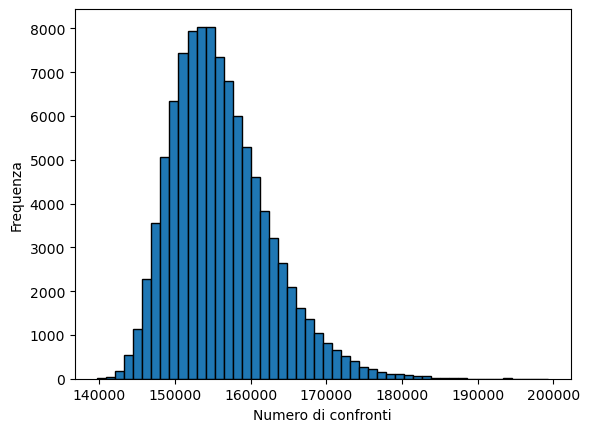

In [15]:
plt.hist(Xr, edgecolor="black", bins=50)
plt.xlabel("Numero di confronti")
plt.ylabel("Frequenza")
plt.show()

In [16]:
v1 = 2
v2 = 3

In [17]:
def markov(mu, val):
  return mu/(val*mu)

In [18]:
print(markov(val_medio, v1))
print(markov(val_medio, v2))

0.5
0.3333333333333333


In [19]:
def chebyshev(mu, val, dev):
    return dev / (((val-1)**2)*(mu**2))

In [20]:
print(chebyshev(val_medio, v1, dev_standard))
print(chebyshev(val_medio, v2, dev_standard))

0.0017059434958289074
0.00042648587395722684
